<a href="https://colab.research.google.com/github/candrajulius/Implementation_of_the_Support_Vector_Machine_and_ANN_Algorithm_For_Student/blob/main/Impelemenatation_Algorithm_ANN_For_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import beberapa library
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

# Untuk memvisualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
def convert_excel_to_csv(excel_file,csv_file):
  # Baca file Excel menggunakan pandas
  data_frame = pd.read_excel(excel_file)

  # Konversi data frame menjadi file CSV
  data_frame.to_csv(csv_file,index=False)
excel_file = "sample_data/Data_Mahasiswa_2019.xlsx"
csv_file = "sample_data/data_mahasiswa.csv"
convert_excel_to_csv(excel_file,csv_file)

In [4]:
data = pd.read_csv('sample_data/data_mahasiswa.csv')

In [5]:
data.head(10)

,No,NIM,NAMA,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5)
0,1,193303030001,Sallyana Yek,4.0,3.74,"3,55",3.90,4.00
1,2,193303030002,Anthony,4.0,3.74,"4,0",3.85,3.95
2,3,193303030003,William Chandra,3.45,3.61,3.27,3.79,3.64
3,4,193303030004,Valentino Damar,4.0,3.61,3.89,3.65,3.80
4,5,193303030005,Nicholas Livando,4.0,3.74,3.94,3.80,3.77
5,6,193303030006,Alvin Rasid,4.0,3.61,"4,0",3.90,4.00
6,7,193303030009,Matthew Evan Phanie,"4,0",3.61,3.89,3.90,4.00
7,8,193303030011,Michael,3.75,3.43,3.83,3.47,3.91
8,9,193303030012,Windy Candra,3.5,3.74,3.9,3.70,4.00
9,10,193303030014,Steven Lie,3.69,3.26,3.89,4.00,3.59


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                88 non-null     int64  
 1   NIM               88 non-null     int64  
 2   NAMA              88 non-null     object 
 3   IPS (semester 1)  88 non-null     object 
 4   IPS (semester 2)  87 non-null     float64
 5   IPS (semester 3)  88 non-null     object 
 6   IPS (semester 4)  88 non-null     float64
 7   IPS (semester 5)  88 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 5.6+ KB


In [7]:
data.drop('No',axis=1,inplace=True)
data.drop('NAMA',axis=1,inplace=True)
data.drop('NIM',axis=1,inplace=True)

In [8]:
data.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5)
0,4.0,3.74,"3,55",3.90,4.00
1,4.0,3.74,"4,0",3.85,3.95
2,3.45,3.61,3.27,3.79,3.64
3,4.0,3.61,3.89,3.65,3.80
4,4.0,3.74,3.94,3.80,3.77
5,4.0,3.61,"4,0",3.90,4.00
6,"4,0",3.61,3.89,3.90,4.00
7,3.75,3.43,3.83,3.47,3.91
8,3.5,3.74,3.9,3.70,4.00
9,3.69,3.26,3.89,4.00,3.59


In [9]:
# Mengecek apakah ada data yang null atau tidak
data.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    1
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
dtype: int64

In [10]:
# Membersihakan data yang null
data_clean = data.dropna()

In [11]:
data_clean.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    0
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
dtype: int64

In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     object 
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     object 
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
dtypes: float64(3), object(2)
memory usage: 4.1+ KB


In [13]:
# Mengecek apakah ada data yang duplicated
data_clean.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
83    False
84    False
85    False
86    False
87    False
Length: 87, dtype: bool

In [14]:
data_clean = pd.DataFrame(data_clean)

In [15]:
# Mengkonversi data string ke float
data_clean['IPS (semester 1)'] = pd.to_numeric(data_clean['IPS (semester 1)'],errors='coerce')
data_clean['IPS (semester 3)'] = pd.to_numeric(data_clean['IPS (semester 3)'], errors='coerce')

In [16]:
data_clean.isnull().sum()

IPS (semester 1)     1
IPS (semester 2)     0
IPS (semester 3)    18
IPS (semester 4)     0
IPS (semester 5)     0
dtype: int64

In [17]:
data_clean['IPS (semester 1)'].fillna(4.0,inplace=True)
data_clean['IPS (semester 3)'].fillna(4.0,inplace=True)

In [18]:
data_clean.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    0
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
dtype: int64

In [20]:
def calculate_row(row):
    return row['IPS (semester 1)'] + row['IPS (semester 2)'] + row['IPS (semester 3)'] + row['IPS (semester 4)'] + row['IPS (semester 5)']

In [21]:
df = pd.DataFrame(data_clean)

In [22]:
df.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5)
0,4.00,3.74,4.00,3.90,4.00
1,4.00,3.74,4.00,3.85,3.95
2,3.45,3.61,3.27,3.79,3.64
3,4.00,3.61,3.89,3.65,3.80
4,4.00,3.74,3.94,3.80,3.77
5,4.00,3.61,4.00,3.90,4.00
6,4.00,3.61,3.89,3.90,4.00
7,3.75,3.43,3.83,3.47,3.91
8,3.50,3.74,3.90,3.70,4.00
9,3.69,3.26,3.89,4.00,3.59


In [23]:
jumlah_data = len(df)
print(jumlah_data)

87


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     float64
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     float64
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
dtypes: float64(5)
memory usage: 4.1 KB


In [25]:
df.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    0
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
dtype: int64

In [26]:
df['hasil'] = df.apply(calculate_row, axis=1)

In [27]:
df.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),hasil
0,4.00,3.74,4.00,3.90,4.00,19.64
1,4.00,3.74,4.00,3.85,3.95,19.54
2,3.45,3.61,3.27,3.79,3.64,17.76
3,4.00,3.61,3.89,3.65,3.80,18.95
4,4.00,3.74,3.94,3.80,3.77,19.25
5,4.00,3.61,4.00,3.90,4.00,19.51
6,4.00,3.61,3.89,3.90,4.00,19.40
7,3.75,3.43,3.83,3.47,3.91,18.39
8,3.50,3.74,3.90,3.70,4.00,18.84
9,3.69,3.26,3.89,4.00,3.59,18.43


In [28]:
# Membuat fungsi lulus dan tidak lulus
def graduation(nilai):
  if nilai >= 19.00:
    return 'Lulus Tepat Waktu'
  else:
    return 'Lulus Tidak Tepat Waktu'

In [29]:
#  Menerapkan fungsi pada kolom 'hasil' untuk membuat kolom 'kelulusan'
df['kelulusan'] = df['hasil'].apply(graduation)

In [30]:
df.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),hasil,kelulusan
0,4.00,3.74,4.00,3.90,4.00,19.64,Lulus Tepat Waktu
1,4.00,3.74,4.00,3.85,3.95,19.54,Lulus Tepat Waktu
2,3.45,3.61,3.27,3.79,3.64,17.76,Lulus Tidak Tepat Waktu
3,4.00,3.61,3.89,3.65,3.80,18.95,Lulus Tidak Tepat Waktu
4,4.00,3.74,3.94,3.80,3.77,19.25,Lulus Tepat Waktu
5,4.00,3.61,4.00,3.90,4.00,19.51,Lulus Tepat Waktu
6,4.00,3.61,3.89,3.90,4.00,19.40,Lulus Tepat Waktu
7,3.75,3.43,3.83,3.47,3.91,18.39,Lulus Tidak Tepat Waktu
8,3.50,3.74,3.90,3.70,4.00,18.84,Lulus Tidak Tepat Waktu
9,3.69,3.26,3.89,4.00,3.59,18.43,Lulus Tidak Tepat Waktu


In [32]:
# Mengubah data "Lulus" menjadi 1 dan "Tidak Lulus" menjadi 0
df['kelulusan'] = df['kelulusan'].map({'Lulus Tepat Waktu': 1, 'Lulus Tidak Tepat Waktu': 0})

In [33]:
df.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),hasil,kelulusan
0,4.00,3.74,4.00,3.90,4.00,19.64,1
1,4.00,3.74,4.00,3.85,3.95,19.54,1
2,3.45,3.61,3.27,3.79,3.64,17.76,0
3,4.00,3.61,3.89,3.65,3.80,18.95,0
4,4.00,3.74,3.94,3.80,3.77,19.25,1
5,4.00,3.61,4.00,3.90,4.00,19.51,1
6,4.00,3.61,3.89,3.90,4.00,19.40,1
7,3.75,3.43,3.83,3.47,3.91,18.39,0
8,3.50,3.74,3.90,3.70,4.00,18.84,0
9,3.69,3.26,3.89,4.00,3.59,18.43,0


In [40]:
X = df[df.columns[:6]]

In [41]:
y = df['kelulusan']

In [42]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [113]:
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [114]:
# Mengompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_test,y_test),verbose=1)


Epoch 1/100
7/7 [==============================] - 4s 52ms/step - loss: 0.4985 - accuracy: 0.7536 - val_loss: 0.6256 - val_accuracy: 0.7778
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 0.3969 - accuracy: 0.8986 - val_loss: 0.5674 - val_accuracy: 0.7778
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.4234 - accuracy: 0.8986 - val_loss: 0.7565 - val_accuracy: 0.7778
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.4216 - accuracy: 0.8986 - val_loss: 0.5604 - val_accuracy: 0.7778
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.3545 - accuracy: 0.8986 - val_loss: 0.6796 - val_accuracy: 0.7778
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3668 - accuracy: 0.8986 - val_loss: 0.6970 - val_accuracy: 0.7778
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.3637 - accuracy: 0.8986 - val_loss: 0.6060 - val_accuracy: 0.7778
Epoch 8/100
7/7 [===

In [116]:
# Evaluasi model pada data uji
_, accuracy = model.evaluate(X_test, y_test)
print('Akurasi: %.2f' % (accuracy * 100))

1/1 [==============================] - 0s 34ms/step - loss: 0.3590 - accuracy: 0.8889
Akurasi: 88.89


In [117]:
# Evaluasi model pada data latih
_, accuracy_data_latih= model.evaluate(X_train, y_train)
print('Akurasi: %.2f' % (accuracy_data_latih * 100))

3/3 [==============================] - 0s 5ms/step - loss: 0.1265 - accuracy: 0.9710
Akurasi: 97.10


# Persentasi lulus tepat waktu dan lulus tidak tepat waktu

In [118]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 78ms/step


In [119]:
# Menghitung persentase kelulusan tepat waktu dan tidak tepat waktu tidak berdasarkan akurasi
kelulusan_tepat_waktu = (y_pred.sum() / len(y_pred) / accuracy * 100)
kelulusan_tidak_tepat_waktu = 100 - kelulusan_tepat_waktu

In [120]:
print("Persentase Lulus Tepat Waktu: {:.2f}%".format(kelulusan_tepat_waktu))
print("Persentase Lulus Tidak Tepat Waktu: {:.2f}%".format(kelulusan_tidak_tepat_waktu))

Persentase Lulus Tepat Waktu: 29.48%
Persentase Lulus Tidak Tepat Waktu: 70.52%


# Membuat Confusion Matrix Pada Data Testing


In [125]:
y_pred_round = y_pred.round()

In [126]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred_round)

In [127]:
print(cm_test)

[[13  1]
 [ 1  3]]


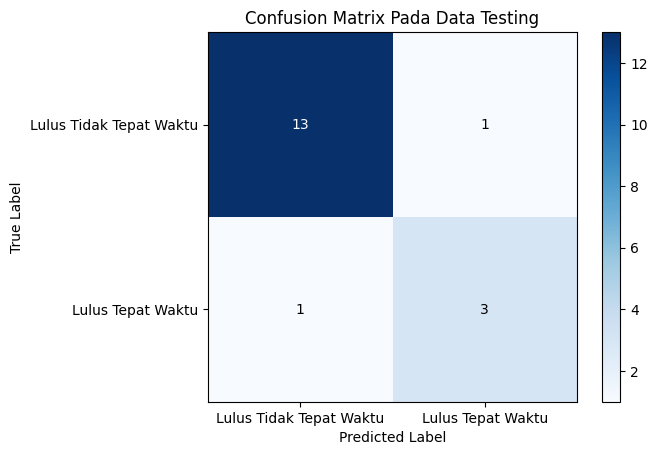

In [130]:
labels = ['Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
fig, ax = plt.subplots()
im = ax.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_test.shape[1]),
       yticks=np.arange(cm_test.shape[0]),
       xticklabels=labels,
       yticklabels=labels,
       title='Confusion Matrix Pada Data Testing',
       ylabel='True Label',
       xlabel='Predicted Label')

thresh = cm_test.max() / 2
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        ax.text(j, i, format(cm_test[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_test[i, j] > thresh else "black")

plt.show()


# Membuat confusion Matrix Pada Data Latih

In [133]:
y_pred_latih = model.predict(X_train)
y_pred_latih = y_pred_latih.round()

3/3 [==============================] - 0s 3ms/step


In [137]:
from sklearn.metrics import confusion_matrix
cm_latih = confusion_matrix(y_train, y_pred_latih)
print(cm_latih)

[[62  0]
 [ 2  5]]


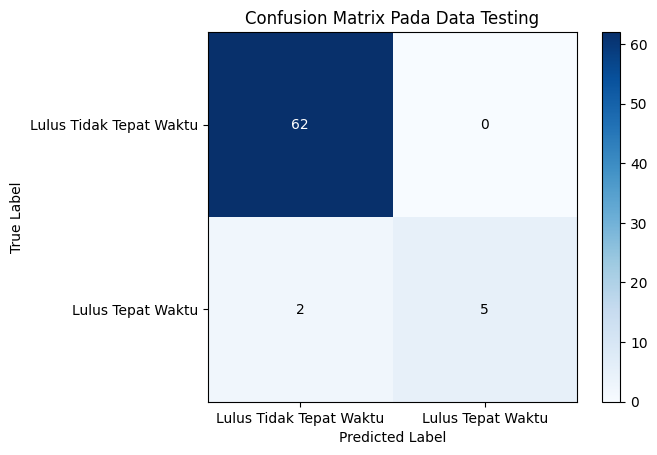

In [138]:
labels = ['Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
fig, ax = plt.subplots()
im = ax.imshow(cm_latih, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_latih.shape[1]),
       yticks=np.arange(cm_latih.shape[0]),
       xticklabels=labels,
       yticklabels=labels,
       title='Confusion Matrix Pada Data Testing',
       ylabel='True Label',
       xlabel='Predicted Label')

thresh = cm_latih.max() / 2
for i in range(cm_latih.shape[0]):
    for j in range(cm_latih.shape[1]):
        ax.text(j, i, format(cm_latih[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_latih[i, j] > thresh else "black")

plt.show()

In [139]:
jumlah_data_testing = X_test.shape[0]
print("Jumlah data testing pada data Data_Mahasiswa_2019.xlsx: ",jumlah_data_testing)

Jumlah data testing pada data Data_Mahasiswa_2019.xlsx:  18


In [140]:
jumlah_data_latih = X_train.shape[0]
print('Jumlah data latih pada Data_Mahasiswa_2019.xlsx ',jumlah_data_latih)

Jumlah data latih pada Data_Mahasiswa_2019.xlsx  69


In [141]:
jumlah_data_target_latih = y_train.shape[0]
print('Jumlah data target latih ',jumlah_data_target_latih)

Jumlah data target latih  69


In [143]:
jumlah_data_target_testing = y_test.shape[0]
print('Jumlah data target latih ',jumlah_data_target_testing)

Jumlah data target latih  18


# Menghitung metrics pada prediksi data latih

In [144]:
# Menghitung metrics pada data
from sklearn.metrics import classification_report
report_data_latih = classification_report(y_train,y_pred_latih)

In [146]:
print('Laporan Metrik Pada Data Latih \n',report_data_latih)

Laporan Metrik Pada Data Latih 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        62
           1       1.00      0.71      0.83         7

    accuracy                           0.97        69
   macro avg       0.98      0.86      0.91        69
weighted avg       0.97      0.97      0.97        69



# Menghitung metrics pada prediksi data testing

In [149]:
# Menghitung metrics pada data
from sklearn.metrics import classification_report
report_data_testing = classification_report(y_test,y_pred_round)

In [151]:
print('Laporan Metrik Pada Data Testing \n',report_data_testing)

Laporan Metrik Pada Data Testing 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.75      0.75      0.75         4

    accuracy                           0.89        18
   macro avg       0.84      0.84      0.84        18
weighted avg       0.89      0.89      0.89        18

